# HW12
**Bakhshande**
**98522157**

In [128]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET 
from random import sample

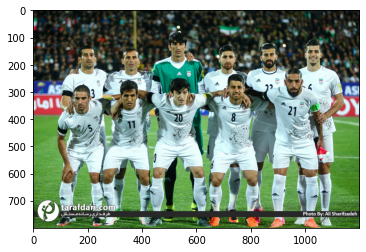

In [129]:
image = cv2.imread("Melli.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [130]:
def IOU(box1, box2):

  x1, y1, x2, y2 = box1
  x3, y3, x4, y4 = box2

  x_left = max(x1, x3)
  y_top = max(y1, y3)
  x_right = min(x2, x4)
  y_bottom = min(y2, y4)

  if x_right < x_left or y_bottom < y_top:
        return 0.0

  width = x_right - x_left
  height = y_bottom - y_top
  intersection = width * height

  box1_area = abs((x2 - x1) * (y2 - y1))
  box2_area = abs((x4 - x3) * (y4 - y3))
  union = box1_area + box2_area - intersection

  iou = intersection / float(union)
  return iou

In [131]:
def sliding_window(image, step, window_size):
  w, h, c = image.shape
  windows = []

  # slide a window across the image
  for y in range(0, w, step):
    for x in range(0, h, step):
    
      # add current window to windows list
      window_w, window_h = window_size
      window = image[y:y + window_h, x:x + window_w]
      windows.append((x, y, x + window_w, y + window_h))
  return windows

In [132]:
windows = sliding_window(image, 20, (80, 90))
windows += sliding_window(image, 40, (80, 100))
windows += sliding_window(image, 60, (80, 110))

In [133]:
len(windows)

3280

In [134]:
# read xml file and get boxes
tree = ET.parse('Melli.xml')
root = tree.getroot()
boxes = [[
    int(root[i][4][0].text), 
    int(root[i][4][1].text), 
    int(root[i][4][2].text), 
    int(root[i][4][3].text)] for i in range(6, 17)]

In [135]:
T1, T2 = 0.3, 0.6

In [136]:
# calculate iou of windows
# and find labels for each window
# we consider the windows that has the iou between 0.3 qnd 0.6 as None

labels = []
for window in windows:
  iou = max([IOU(bb, window) for bb in boxes])
  if iou > T2:
    labels.append("Face")
  elif iou < T1:
    labels.append("BackGround")
  else:
    labels.append("None")

In [137]:
len(labels)

3280

In [138]:
labels.count("BackGround")

3089

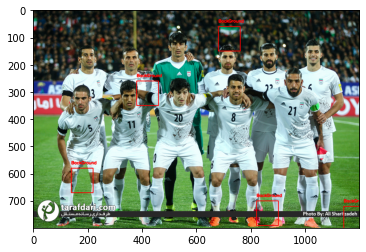

In [145]:
rand_samples = sample(range(len(windows)), 5)
melli = image.copy()

for random in rand_samples: 
  x1, y1, x2, y2 = np.array(windows[random], dtype = object)
  cv2.rectangle(melli, (x1, y1), (x2, y2), (255, 0, 0), 2)
  cv2.putText(melli, labels[random], (x1, y1 - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.imshow(np.array(melli))
plt.show()

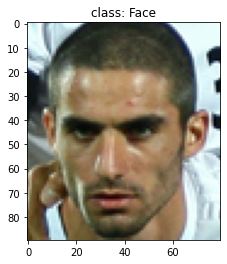

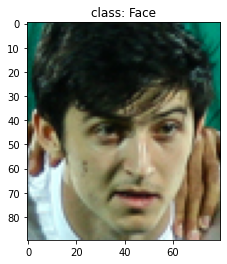

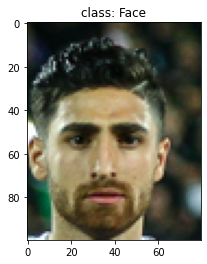

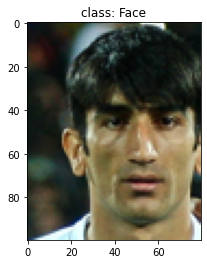

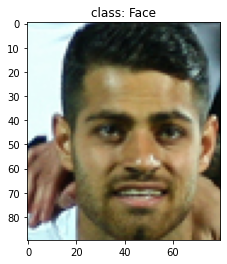

In [144]:
face_indices = [i for i in range(len(labels)) if labels[i]=="Face"]
rand_faces = sample(face_indices, 5)

for random in rand_faces: 
  x1, y1, x2, y2 = np.array(windows[random], dtype = object)
  window = image[y1:y2, x1:x2]
  plt.title(f"class: {labels[random]}")
  plt.imshow(window)
  plt.show()

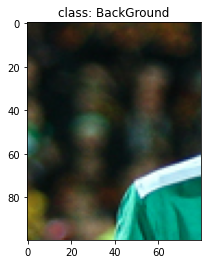

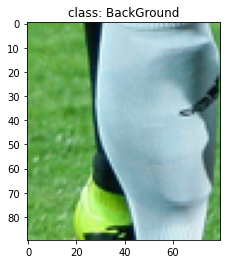

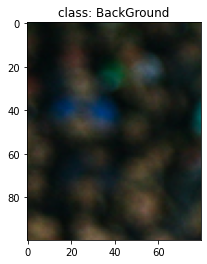

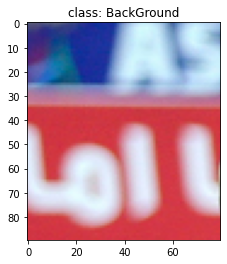

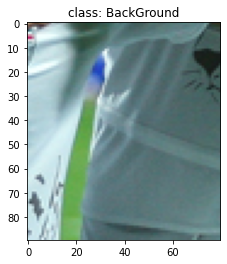

In [143]:
background_indices = [i for i in range(len(labels)) if labels[i]=="BackGround"]
rand_backgrounds = sample(background_indices, 5)

for random in rand_backgrounds: 
  x1, y1, x2, y2 = np.array(windows[random], dtype = object)
  window = image[y1:y2, x1:x2]
  plt.title(f"class: {labels[random]}")
  plt.imshow(window)
  plt.show()